In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
import itertools
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split

In [21]:
biopslides=pd.read_csv('final.csv')
biopslides.shape

(8911, 22)

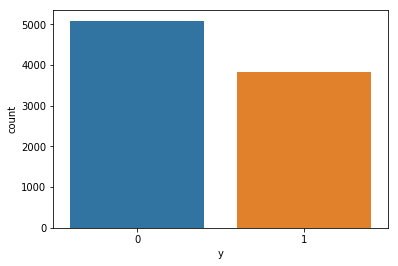

In [22]:
sns.countplot(x='y',data=biopslides)
plt.show()

In [3]:
biopslides.head()

,Area,Centroid_1,Centroid_2,BoundingBox_1,BoundingBox_2,BoundingBox_3,BoundingBox_4,MajorAxisLength,MinorAxisLength,Eccentricity,...,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter,PerimeterOld,neg_red_mean,neg_blue_mean,y
0,87,210.609195,814.333333,205.5,796.5,10,33,30.228940,8.246985,0.962066,...,89,-1,10.524820,0.478022,0.263636,87.532,91.840620,99.977011,129.965517,0
1,64,220.000000,665.531250,215.5,655.5,9,19,21.072286,6.641522,0.949033,...,68,-2,9.027033,0.533333,0.374269,68.395,72.426407,96.796875,130.328125,0
2,72,223.277778,712.513889,217.5,705.5,11,15,15.238664,8.556408,0.827481,...,84,-11,9.574615,0.660550,0.436364,50.118,52.526912,79.263889,118.000000,0
3,71,223.281690,797.577465,217.5,789.5,11,17,17.802708,10.795076,0.795181,...,81,-3,9.507892,0.489655,0.379679,69.487,72.426407,96.591549,126.366197,0
4,60,222.666667,539.983333,218.5,532.5,8,15,16.124791,7.142052,0.896559,...,70,-7,8.740387,0.681818,0.500000,37.456,39.213203,78.566667,116.416667,0


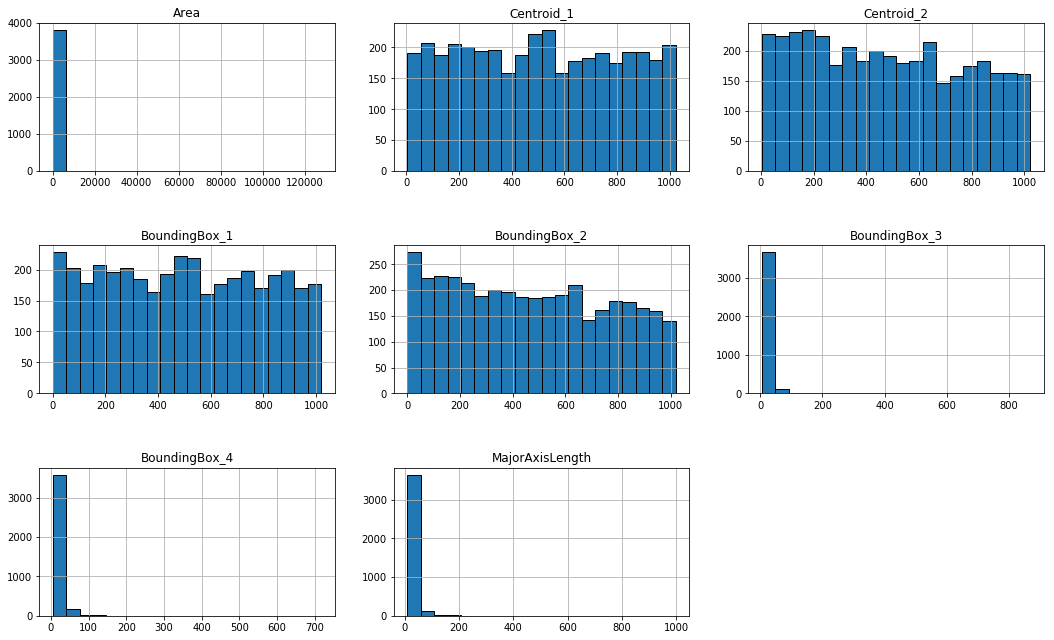

In [14]:
biops1=biopslides[biopslides['y']==1]
columns=biopslides.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    biops1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

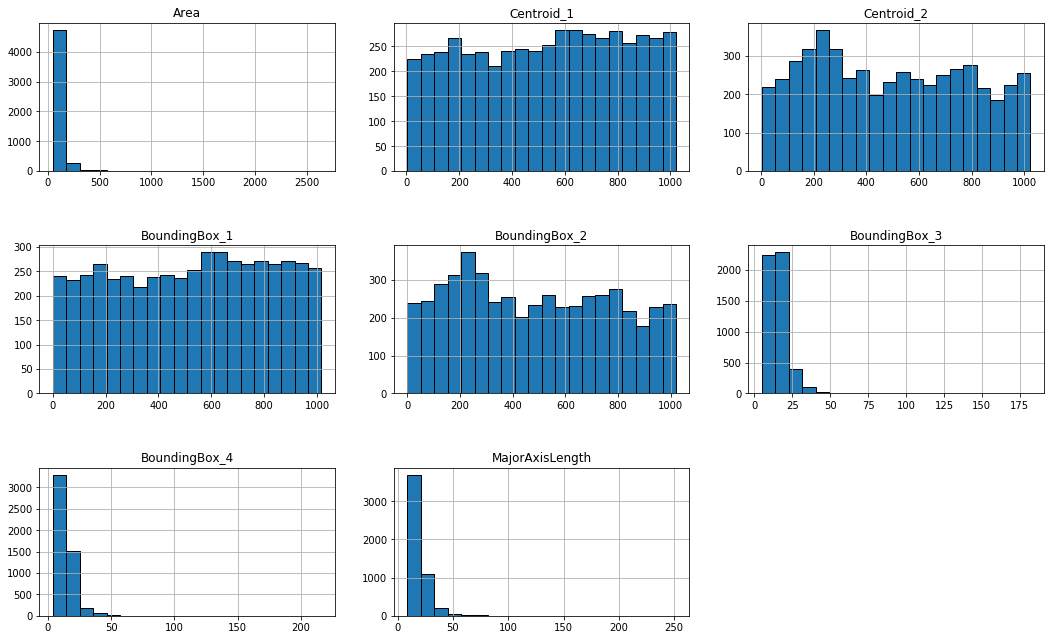

In [27]:
biops2=biopslides[biopslides['y']==0]
columns=biopslides.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    biops2[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'x'

In [4]:
X = biopslides.drop('y', axis=1)  
y = biopslides['y']  

In [5]:
from sklearn import metrics 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [6]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
y_pred = svclassifier.predict(X_test)  

In [8]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[1003    4]
 [   5  771]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1007
          1       0.99      0.99      0.99       776

avg / total       0.99      0.99      0.99      1783



In [9]:
svclassifier.predict([[306,13.17647059,10.67320261,0.5,0.5,33,31,41.03312361,14.01716738,0.939843199,43.71323485,481,320,-7,19.73857393,0.636174636,0.299120235,112.707,117.3969696,179.503268,190.8071895]])

array([1], dtype=int64)

In [10]:
svclassifier.predict([[93,8.505376344,618.3548387,0.5,610.5,16,17,21.75009501,6.718138903,0.951101472,44.93139103,133,94,0,10.88169461,0.69924812,0.341911765,57.594,60.52691193,98.78494624,130.3010753]])

array([0], dtype=int64)

In [11]:
training_accuracy = []
test_accuracy = []

In [12]:
print("Accuracy on training set: {:.2f}".format(svclassifier.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svclassifier.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.99


[ 3.37327330e-03 -2.98791425e-04  3.27443721e-03  5.13850691e-04
 -3.15827415e-03 -2.30735397e-03  4.26187100e-03  3.90640344e-03
 -3.77189616e-05  1.47579505e-04 -1.37897484e-03  3.94568498e-04
 -3.04873614e-03  7.89360905e-04  1.12134435e-03 -2.83058832e-05
 -1.38171832e-04  1.60410522e-03  3.32633616e-03  5.32101524e-02
 -5.32916588e-02]


ValueError: x and y must be the same size

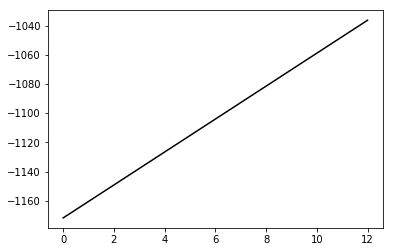